In [1]:
import pandas as pd
# import ast
# import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import re
# import random
# import string
%matplotlib inline


# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)


print("done")

done


In [2]:
import import_func as imp
import tags_work as tgs
import desc_vis as vis
import classifier_func as cls
import classifier_help as clh

In [3]:
full_advice = "../data/genre_advice_full_021520.jl"
full_filename = "../data/by_article_fulltext_020920.jl"

# get full text dataset as a df
advice_df = imp.init_df(full_advice, "full", advice=True)
advice_df = advice_df[advice_df["year"]<2020]
full_df = imp.init_df(full_filename, "full")
full_df = full_df[full_df["year"]<2020]
full_df["advice"] = ["yes" if "advice" in x else "no" for x in full_df["tags"]]
advice_tag_df = full_df[full_df.advice=="yes"]

print("done")

done


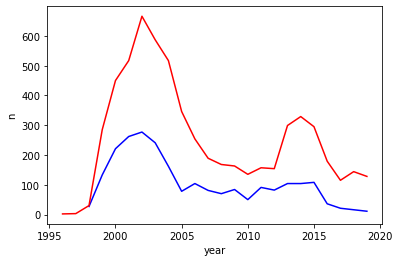

In [4]:
full_vis = vis.prep_per(full_df, group_by="year")
advice_vis = vis.prep_per(advice_df, group_by="year")

sns.lineplot(x = "year", y = "n", color = "blue", data=advice_vis)
sns.lineplot(x = "year", y = "n", color = "red", data=full_vis)

# plt.savefig("../figs/advice_section.png")

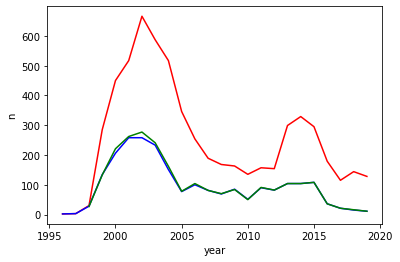

In [5]:
# advice by tag--also okay

advice_tag_vis = vis.prep_per(advice_tag_df, group_by="year")

sns.lineplot(x = "year", y = "n", color = "red", data=full_vis)
sns.lineplot(x = "year", y = "n", color = "blue", data=advice_tag_vis)
sns.lineplot(x = "year", y = "n", color = "green", data=advice_vis)

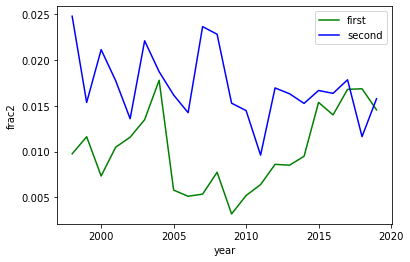

In [26]:
# just using the advice scrape only 

counts_df = clh.pronouns(advice_df)

counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

advice_counts_plot_df = counts_df.groupby("year").mean()

advice_counts_plot_df = advice_counts_plot_df.reset_index()

# counts_plot_df.head()

sns.lineplot(x = "year", y = "frac1", color = "green", label="first", data=advice_counts_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "blue", label="second", data=advice_counts_plot_df)

# plt.savefig("../figs/person_advice.png")

In [7]:
# just using the advice tagged articles in the full dataset--again, not sure if this one works--don't think the advice tag is as reliable as the sectioning off

counts_df = clh.pronouns(advice_tag_df)

print(counts_df.sort_values(by="year").tail())
counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

counts_plot_df = counts_df.groupby("year").mean()

counts_plot_df = counts_plot_df.reset_index()

# sns.lineplot(x = "year", y = "frac1", color = "green", label="first", data=counts_plot_df)
# sns.lineplot(x = "year", y = "frac2", color = "blue", label="second", data=counts_plot_df)

id  year  first  second    wc
254  268  2015     37      62  1344
255  269  2015      9      67  1385
256  270  2015      9      64  1354
247  259  2015     18      56   946
378  674  2016      0      46   956


In [23]:
advice_tag_df.tail(3)

,id,headline,tags,authors,date,time,text,bio,date_seq,month_seq,year,n_posts_author,column1,column2,advice,one_time,n
5984,256,want to become a better mentor? ask for anonymous feedback,"[advice, non-disciplinary]",katie langin,2019-04-29,2:15 pm,"by last month, david mobley took an “emotionally difficult” step: the associate professor of ...",[katie langin is the associate editor for ],8246,280,2019,33,yes,yes,yes,no,1
5990,234,it’s ok to quit your ph.d.,"[advice, non-disciplinary]",katie langin,2019-06-25,2:30 pm,"by in retrospect, it was the beginning of the end. one night in 2010, benjamin schulz was wor...",[katie langin is the associate editor for ],8303,282,2019,33,yes,yes,yes,no,1
6062,12,targeting cancer and careers: precision medicine,"[advice, midcareer, postdoc, academic, industry, life sciences]",ellen r. delisio,2019-03-15,2:00 pm,"by the migration away from “one-size-fits-all” medicine, particularly in the areas of cancer ...",[ellen r. delisio is a freelance writer who specializes in the sciences and education. she is ba...,8201,279,2019,1,no,no,yes,no,1


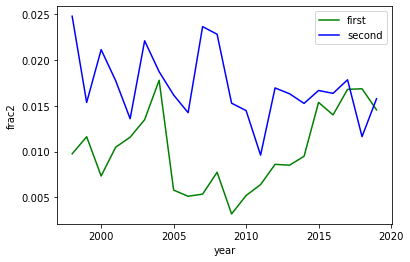

In [17]:
# just using the advice tag only 

counts_df = clh.pronouns(advice_tag_df)

counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

advice_counts_plot_df = counts_df.groupby("year").mean()

advice_counts_plot_df = advice_counts_plot_df.reset_index()

sns.lineplot(x = "year", y = "frac1", color = "green", label="first", data=advice_counts_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "blue", label="second", data=advice_counts_plot_df)


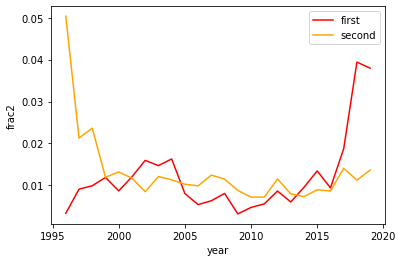

In [18]:
counts_df = clh.pronouns(full_df)

counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

counts_plot_df = counts_df.groupby("year").mean()

full_counts_plot_df = counts_plot_df.reset_index()
counts_plot_df = counts_plot_df.reset_index()
counts_df.head()

sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=full_counts_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "orange", label="second", data=full_counts_plot_df)

# plt.savefig("../figs/person_all.png")


In [19]:
counts_plot_df.head()

,year,id,first,second,wc,frac1,frac2
0,1996,0.500000,7.000000,90.000000,1813.500000,0.003342,0.050339
1,1997,40.333333,9.000000,22.333333,1078.000000,0.009095,0.021271
2,1998,134.166667,10.633333,29.400000,1351.233333,0.009906,0.023650
3,1999,677.417544,11.663158,11.126316,747.396491,0.011894,0.011942
4,2000,1059.584444,8.486667,12.151111,782.442222,0.008687,0.013195


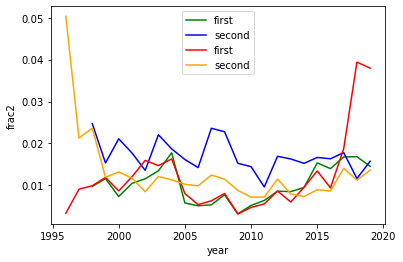

In [21]:
sns.lineplot(x = "year", y = "frac1", color = "green", label="first", data=advice_counts_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "blue", label="second", data=advice_counts_plot_df)
sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=full_counts_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "orange", label="second", data=full_counts_plot_df)

# plt.savefig("../figs/person_advice_all.png")

same thing but for columns

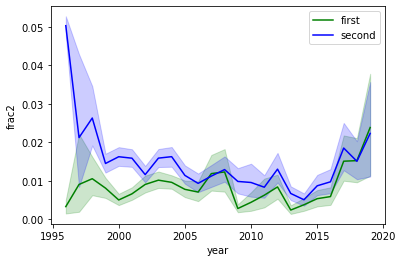

In [22]:
column_df = full_df[full_df.column2=="yes"]
not_column_df = full_df[full_df.column2=="no"]

counts1_df = clh.pronouns(column_df)
counts2_df = clh.pronouns(not_column_df)


counts1_df["frac1"] = counts1_df["first"]/counts1_df["wc"]
counts1_df["frac2"] = counts1_df["second"]/counts1_df["wc"]
counts2_df["frac1"] = counts2_df["first"]/counts2_df["wc"]
counts2_df["frac2"] = counts2_df["second"]/counts2_df["wc"]

counts1_plot_df = counts1_df.groupby("year").mean()
counts2_plot_df = counts2_df.groupby("year").mean()

counts1_plot_df = counts1_plot_df.reset_index()
counts2_plot_df = counts2_plot_df.reset_index()

sns.lineplot(x = "year", y = "frac1", color = "green", label="first", data=counts1_df)
sns.lineplot(x = "year", y = "frac2", color = "blue", label="second", data=counts1_df)
# sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=counts2_df)
# sns.lineplot(x = "year", y = "frac2", color = "orange", label="second", data=counts2_df)